<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_League_of_Legends_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цель исследования - определить возможность прогнозирования победы в матче League of Legends с использованием методов машинного обучения и выявить наиболее важные факторы влияющие на победу для организации спортивной подготовки в компьютерном спорте

# Источники и введение



Данные, которые мы используем для проведения этого анализа, были получены из  [данных](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min) Kaggle, который был получен через Riot API. Он включает данные из 9879 соревновательных матчей с высоким рейтингом ( Diamond I to Master) с 19 features на команду и одной целевой переменной, которая указывает, привел ли матч к победе синей команды.

**Глоссарий функций**:

**Ward**: предмет, который игроки могут разместить на карте, чтобы открыть близлежащую область. Очень полезно для управления картой/целями. 

**Assist**: присуждается частичное количество золота и очков опыта, когда нанесенный урон способствует смерти врага.

**Elite Monsters**: монстры с высоким уровнем здоровья/урона, которые дают огромный бонус (золото/опыт/характеристики) при убийстве командой.

**Dragon**: он же Drake. Этот могущественный нейтральный монстр дает различные постоянные эффекты и положительные эффекты, когда его убивает команда.

**Herald**: монстр, который появляется на восьмой минуте. Дает бафф, который позволяет пользователю вызывать Herald для вашей команды, чтобы помочь проталкивать башни и линии.

**Tower**: Сооружение, преграждающее путь противнику к базе. Они получают высокий урон и стреляют по противникам в определенном радиусе.

**Minions**: неигровые персонажи (NPC), которые дают опыт после смерти и золото игроку, нанесшему последний удар.

**Jungle Minions**: NPC, принадлежащие NO TEAM. Они дают золото, опыт и временные баффы, когда их убивают игроки.

**Gank**: внезапная атака на вражеского champion, обычно координируемая и выполняемая лесником или бродячим лейнером, а также лейнером, получающим ганк. Ранние попытки Gank часто пытаются застать вражеского champion  врасплох и убить его, прежде чем он сможет добраться до своей башни или товарищей по команде.

**Gold**: валюта, присуждаемая за убийство монстров или вражеских игроков, а также за выполнение задач.

**Level**: Champion level. Max is 18.

**Методы**


Random Forest 

Logistic Regression (Логистическая регрессия)
Random Forest (Случайный леc) 
XGBoost: Random Forest 

Логистическая регрессия — это модель с наименьшими вычислительными затратами, поэтому мы используем ее в качестве основы для сравнения других наших моделей и определения того, есть ли смысл в использовании более сложных моделей.

Затем мы переходим к моделям Random Forest и XGBoost, чтобы узнать,  обеспечивают ли ансамблевые методы лучшую прогностическую модель.

# Подготовка данных

In [1]:
# Экспорт необходимых для исследования библиотек
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

from xgboost import XGBRFClassifier, XGBClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Загрузка данных и првоерка их целостности
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


None

Оценка показала, что у нас отсутствуют пропуски в данных и все они являются численным типом.

In [3]:
df1 = df.copy() # произведём копирование датасета для защиты от случайного изменения

Произведём предварительную очистку данных и уберём идентификатор игр, так как не планируем использовать его в исследовании

In [4]:

df1.drop('gameId', axis=1, inplace=True)
df1.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
# произведём резервное копирование очищенного датасета
df_big = df.copy()

In [6]:
# выберем данные для дальнейшего исследования и создадим новый выборочный датасет
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,...,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,...,2,1,6,6,7,1,0,0,225,67


Произведём корреляционный анализ полученного набора данных

In [7]:
df_big.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


Визуализируем полученные корреляции на полном датасете.

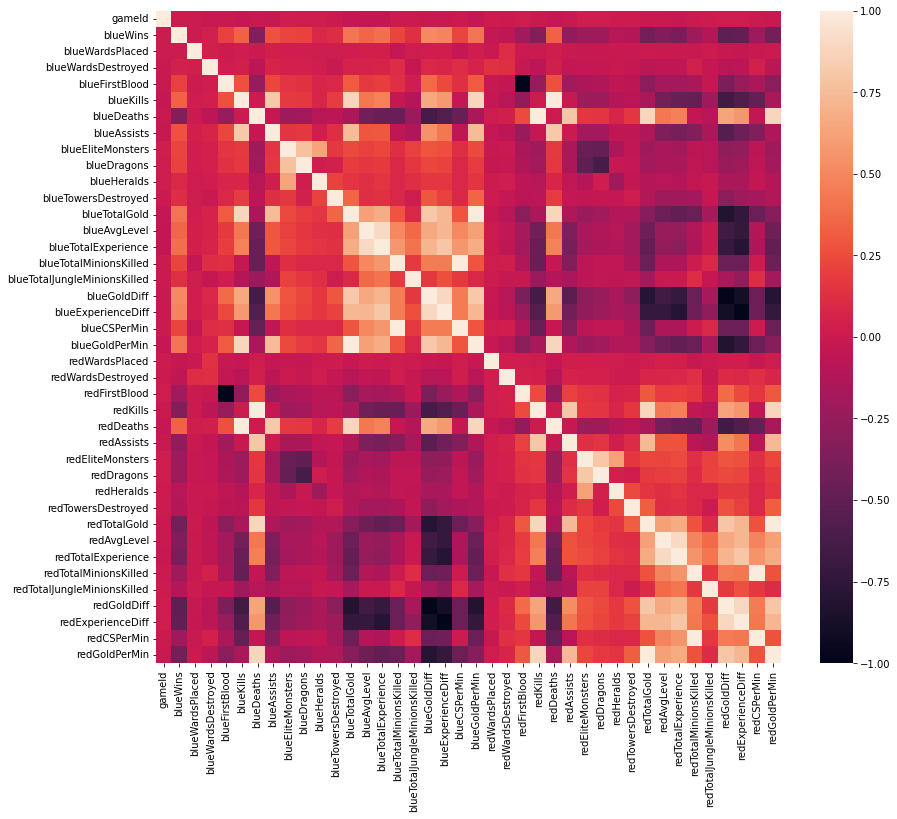

In [8]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_big.corr()) # light color : +vely corr, dark color: -vely corr


Мы видим, что есть признаки с высокой [мультиколлинеарностью](https://habr.com/ru/company/akbarsdigital/blog/592493/). Это  проблема для логистической регрессии, поэтому мы будем избегать использования df_big для нашей модели логистической регрессии. 

Для лучшего понимания сделаем тепловую карту корреляционной матрицы более наглядной изменив цветовую палитру и добавив численные значения.

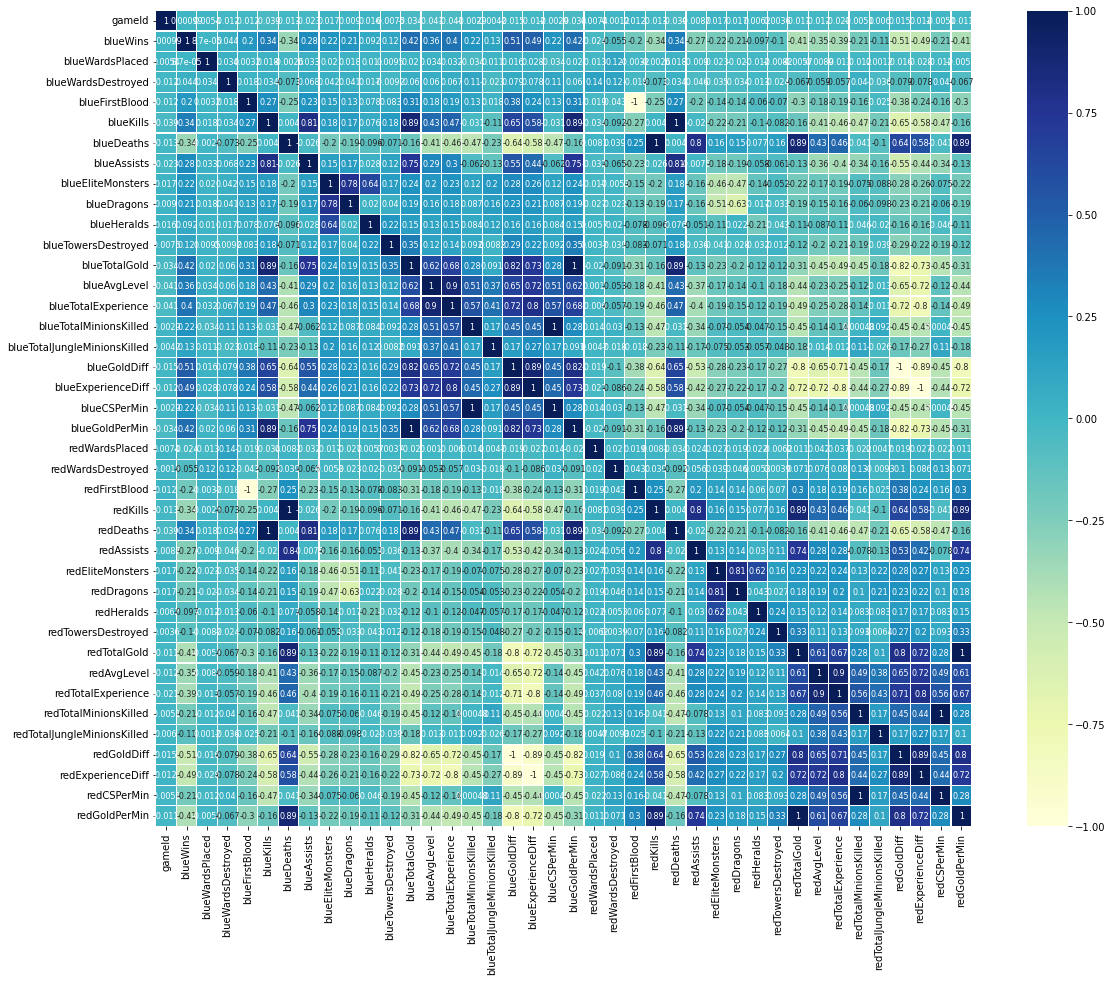

In [9]:
plt.figure(figsize = (20,15))

sns.heatmap(df_big.corr(),annot = True, vmax=1, square=True, cmap="YlGnBu", 
        linewidths=0.1, annot_kws={"size":8})

Визуализируем корреляционную матрицу для выборочного набора данных.

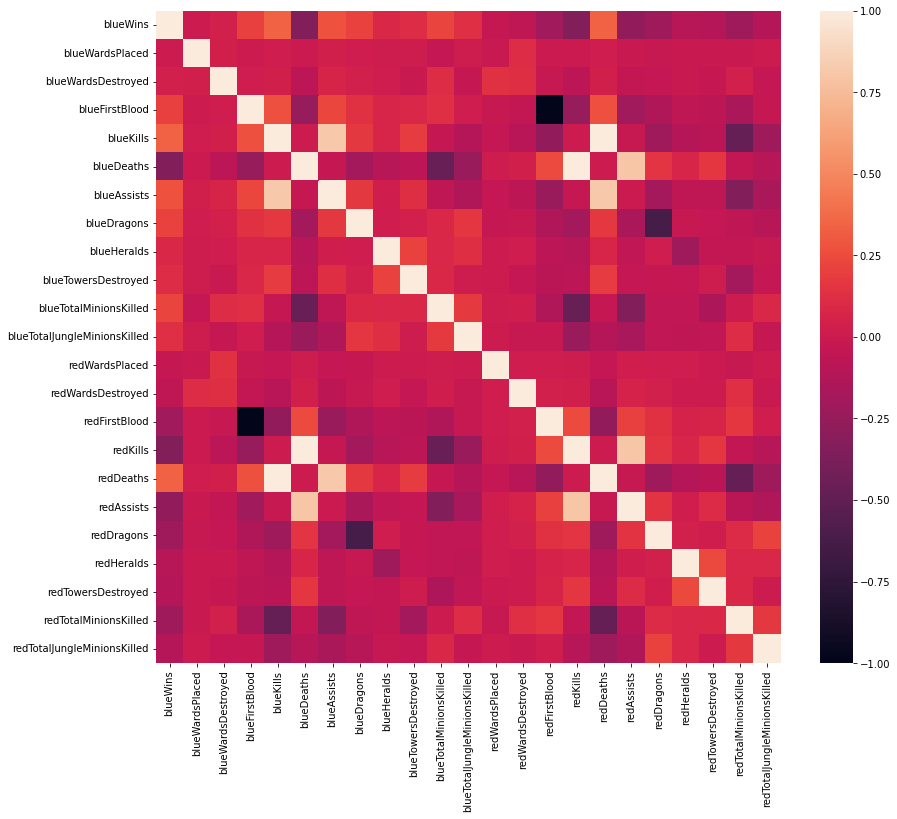

In [10]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_select.corr()) # light color : +vely corr, dark color: -vely corr

Несмотря на то, что мультиколлинеарность не такая уж большая проблема в этом  датасете, у нас все еще есть некоторые признаки с идеальной мультиколлинеарностью: redFirstBlood, redKills и redDeaths. Эти признаки являются идеальными противоположностями blueFirstBlood, blueDeaths и blueKills соответственно, поэтому мы продолжим и удалим эти столбцы, чтобы подготовить наш набор данных для логистической регрессии.

In [11]:
# удалим признаки с высокой мультиколлинеарностью.
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

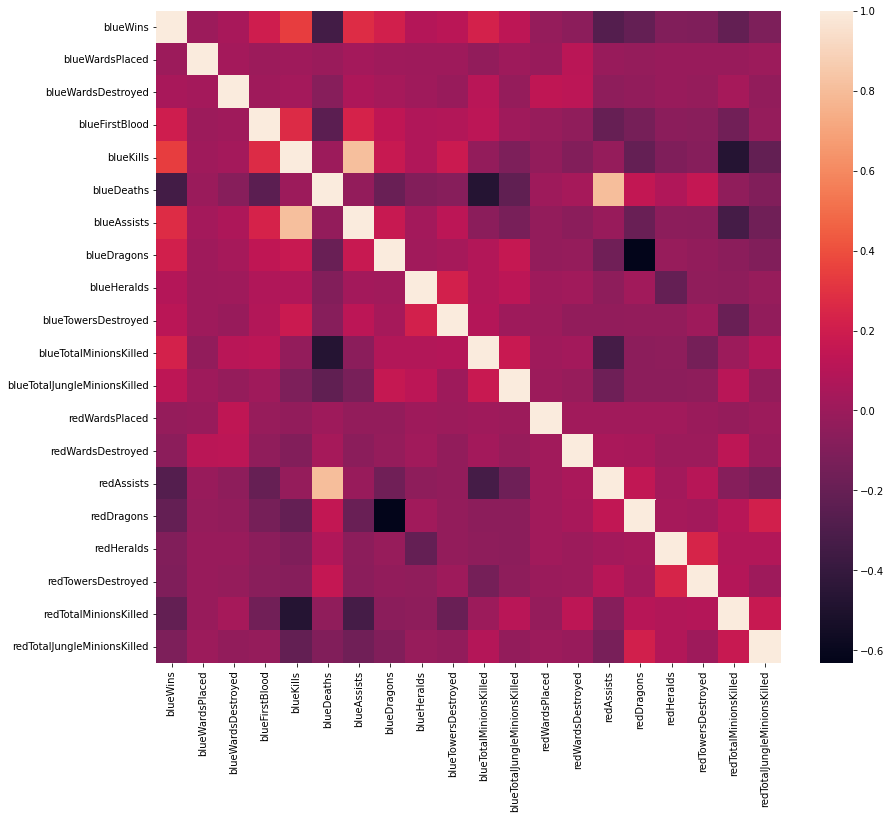

In [12]:
# создадим новую корреляционную матрицу
plt.figure(figsize=(14, 12))
sns.heatmap(df_select.corr()) # light color : +vely corr, dark color: -vely corr


Хотя redAssists и blueAssists имеют довольно высокую корреляцию с blueDeaths и blueKills соответственно, мы оставим эти признаки в нашем наборе данных, поскольку коэффициенты корреляции не слишком высоки, а влияние передач на исход матча по-прежнему важно для нашего анализа.

Визуализируем корреляционную матрицу выборочного набора данных с выводом численных значений

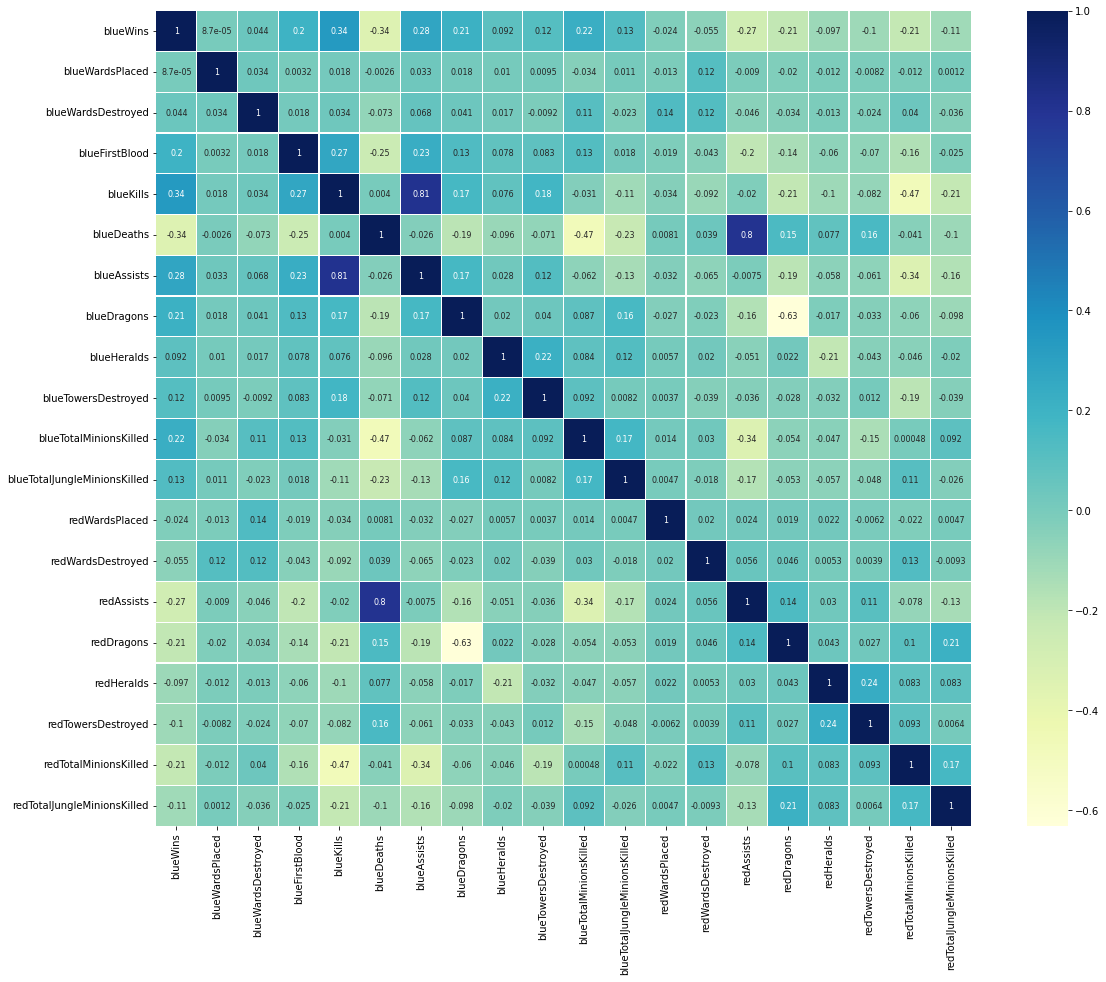

In [13]:
plt.figure(figsize = (20,15))

sns.heatmap(df_select.corr(),annot = True, vmax=1, square=True, cmap="YlGnBu", 
        linewidths=0.1, annot_kws={"size":8})

# Подготовка инструментов исследования

Создадим необходимый для исследования набор функций по оценке модели

In [14]:
# функция оценки модели

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
    """
    Displays evaluation metrics including classification report, confusion
    matrix, ROC-AUC curve.
    
    If the argument 'params' is passed, will display a table of the 
    parameters hyperparameters used in the model.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
    """
        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    
def split_scale(df, target, scaler=StandardScaler()):
    """
    Creates train-test splits and scales training data.

    Args:
        df (DataFrame): DataFrame with features and target variable.
        target (str): Name of target variable.
        scaler (scaler object): Scaler to use on features DataFrame. Default
                                is StandardScaler.
        
    Returns:
        X_train (DataFrame) : Training data with scaled feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with scaled feature variables.
        y_test (Series) : Testing data with target variable.
    """
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):
    """
    Fits model on training data and displays classification evaluation metrics.

    Args:
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
        model (classifier object) : Model after fitting on training data.
    """
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

Разделение данных на тренировочный и тестовый набор данных

In [15]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'blueWins')
X_train_big, X_test_big, y_train_big, \
             y_test_big = split_scale(df_big, 'blueWins')

## Простая логистическая регрессия (Logistic Regression) на выборочном наборе данных (df_select)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7183    0.7219    0.7201      4203
           1     0.7199    0.7163    0.7181      4194

    accuracy                         0.7191      8397
   macro avg     0.7191    0.7191    0.7191      8397
weighted avg     0.7191    0.7191    0.7191      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7409    0.7359    0.7384       746
           1     0.7341    0.7391    0.7366       736

    accuracy                         0.7375      1482
   macro avg     0.7375    0.7375    0.7375      1482
weighted avg     0.7375    0.7375    0.7375      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


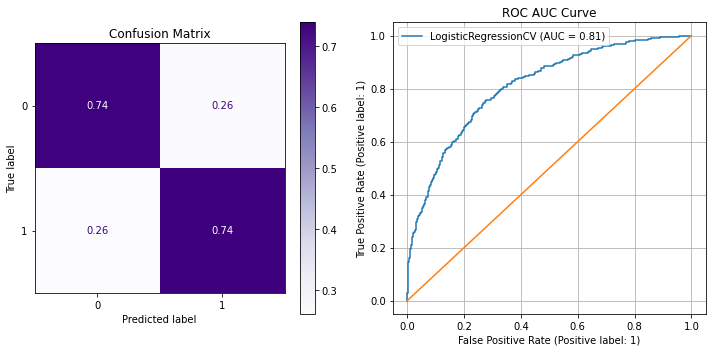

In [16]:
# Fit and evaluate df_select on a Logistic Regression model.
log_select = fit_eval(LogisticRegressionCV(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

**Результаты:** recall score - 0.7191 на тренировочном наборе данных training data, а  тестовые данные test data получили оценку 0,7375, что означает, что из  побед и поражений наша модель логистической регрессии правильно предсказывает 73,75% . У нас также нет проблем с недообучеенностью или переобученностью модели (overfitting).



## Подбор гиперпараметров методом GridSearch CV для Logistic Regression на выборочном наборе данных (df_select)

https://newtechaudit.ru/gridsearchcv-pomoshhnik-v-vybore/

In [17]:
# проведём поиск лучших гиперпараметров
log_reg = LogisticRegression(random_state=42)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1e6,1e12],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'fit_intercept': [True, False],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid = GridSearchCV(log_reg, params, scoring='recall_macro')
log_grid.fit(X_train_select, y_train_select)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000000.0,
                               1000000000000.0],
                         'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

In [18]:
# посмотрим лучшие гиперпараметры
log_grid.best_params_

{'C': 0.01,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'penalty': 'l1',
 'solver': 'liblinear'}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7212    0.7214    0.7213      4203
           1     0.7207    0.7206    0.7206      4194

    accuracy                         0.7210      8397
   macro avg     0.7210    0.7210    0.7210      8397
weighted avg     0.7210    0.7210    0.7210      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7391    0.7252    0.7321       746
           1     0.7267    0.7405    0.7335       736

    accuracy                         0.7328      1482
   macro avg     0.7329    0.7328    0.7328      1482
weighted avg     0.7329    0.7328    0.7328      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


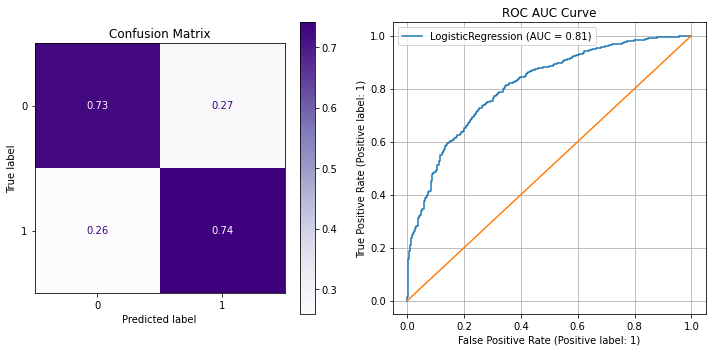

****MODEL PARAMETERS****


,parameters
C,0.01
class_weight,balanced
dual,False
fit_intercept,False
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l1


In [19]:
# оценим модель с лучшими параметрами
evaluate_model(log_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

Мы видим небольшое снижение recall  по сравнению с нашей базовой моделью логистической регрессии. Давайте посмотрим, сможем ли мы настроить наши гиперпараметры, чтобы улучшить наш результат.

In [20]:

log_reg_ref = LogisticRegression(random_state=42)

params = {'C': [0.0001, 0.001],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid_refined = GridSearchCV(log_reg_ref, params, scoring='recall_macro')
log_grid_refined.fit(X_train_select, y_train_select)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.0001, 0.001], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

In [21]:

log_grid_refined.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'sag'}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7173    0.7185    0.7179      4203
           1     0.7175    0.7163    0.7169      4194

    accuracy                         0.7174      8397
   macro avg     0.7174    0.7174    0.7174      8397
weighted avg     0.7174    0.7174    0.7174      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7358    0.7279    0.7318       746
           1     0.7272    0.7351    0.7311       736

    accuracy                         0.7314      1482
   macro avg     0.7315    0.7315    0.7314      1482
weighted avg     0.7315    0.7314    0.7314      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


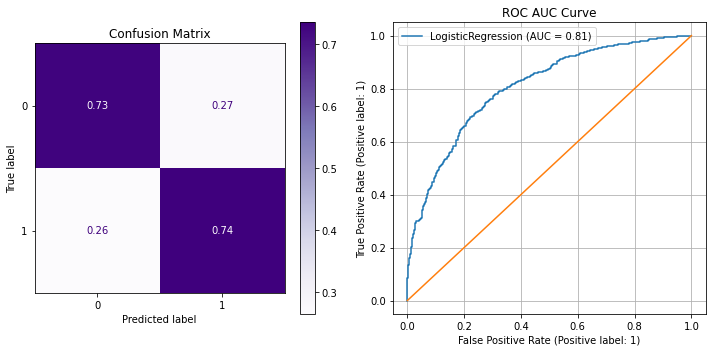

****MODEL PARAMETERS****


,parameters
C,0.001
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [22]:

evaluate_model(log_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

recall продолжает падать, и поэтому мы  вероятно, достигли максимально возможной оценки с помощью логистической регрессии. Следовательно, мы оставим log_select как нашу лучшую модель логистической регрессии на данный момент.

## Алгоритм случайного леса (Random Forest)

### Применениен на выборочном наборе данных (df_select)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      4203
           1     1.0000    1.0000    1.0000      4194

    accuracy                         1.0000      8397
   macro avg     1.0000    1.0000    1.0000      8397
weighted avg     1.0000    1.0000    1.0000      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7212    0.7212    0.7212       746
           1     0.7174    0.7174    0.7174       736

    accuracy                         0.7193      1482
   macro avg     0.7193    0.7193    0.7193      1482
weighted avg     0.7193    0.7193    0.7193      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


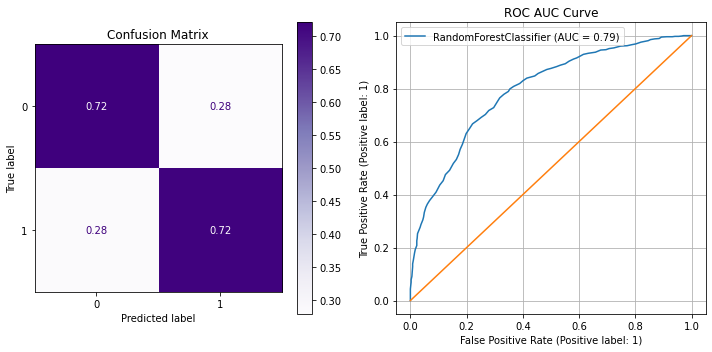

RandomForestClassifier(random_state=42)

In [23]:
# применим случайный лес на выборочном наборе данных
fit_eval(RandomForestClassifier(random_state=42), X_train_select, \
         y_train_select, X_test_select, y_test_select)

### Полный набор данных (df_big)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998      4203
           1     0.9998    0.9998    0.9998      4194

    accuracy                         0.9998      8397
   macro avg     0.9998    0.9998    0.9998      8397
weighted avg     0.9998    0.9998    0.9998      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7180    0.7373    0.7275       746
           1     0.7263    0.7065    0.7163       736

    accuracy                         0.7220      1482
   macro avg     0.7221    0.7219    0.7219      1482
weighted avg     0.7221    0.7220    0.7219      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


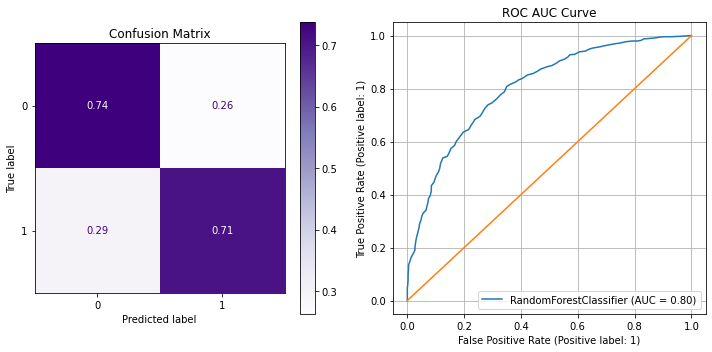

RandomForestClassifier(random_state=42)

In [24]:
# применим алгоритм на полном наборе данных 
fit_eval(RandomForestClassifier(random_state=42), X_train_big, y_train_big, \
                                                  X_test_big, y_test_big)

Хотя оценки наших моделей случайного леса, запускаемых на тестовых данных, аналогичны тем, которые мы видели в нашей логистической регрессии,  существует проблема переобучения (overfitting). Чтобы предотвратить overfitting, мы в идеале будем использовать gridsearch, чтобы подобрать оптимальные гиперпараметры для этой модели и этих данных.

## Градиентный бустинг случайного леса XGBoost: Random Forest

### Применение на выборочном наборе данных (df_select)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.6983    0.7171    0.7076      4203
           1     0.7086    0.6896    0.6990      4194

    accuracy                         0.7033      8397
   macro avg     0.7035    0.7033    0.7033      8397
weighted avg     0.7035    0.7033    0.7033      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7065    0.7131    0.7098       746
           1     0.7064    0.6997    0.7031       736

    accuracy                         0.7065      1482
   macro avg     0.7065    0.7064    0.7064      1482
weighted avg     0.7065    0.7065    0.7065      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


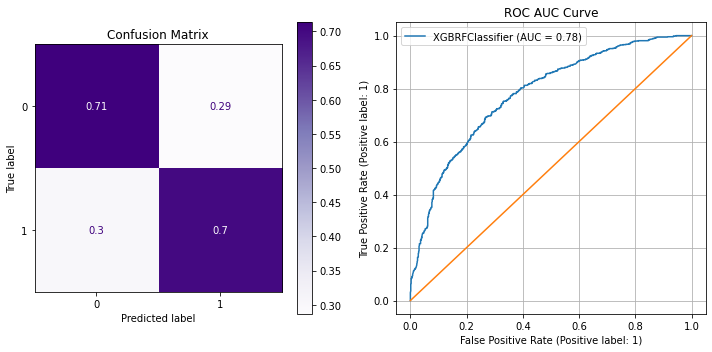

In [25]:
# Fit and evaluate XGBoost on df_select.
xgb_select = fit_eval(XGBRFClassifier(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

### Применение на полном наборе данных (df_big)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7140    0.7568    0.7348      4203
           1     0.7407    0.6962    0.7178      4194

    accuracy                         0.7266      8397
   macro avg     0.7274    0.7265    0.7263      8397
weighted avg     0.7274    0.7266    0.7263      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7042    0.7627    0.7323       746
           1     0.7374    0.6753    0.7050       736

    accuracy                         0.7193      1482
   macro avg     0.7208    0.7190    0.7186      1482
weighted avg     0.7207    0.7193    0.7187      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


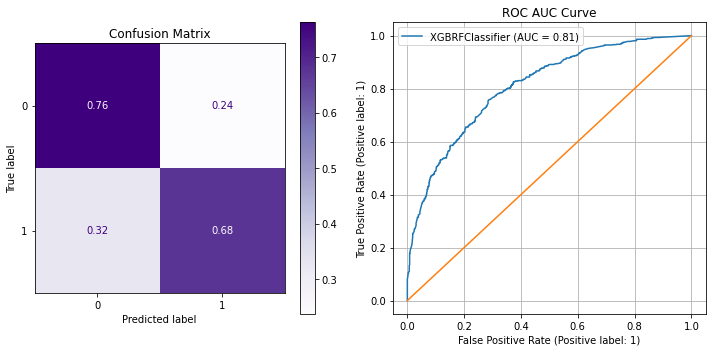

XGBRFClassifier(random_state=42)

In [26]:
# Fit and evaluate XGBoost on df_big.
fit_eval(XGBRFClassifier(random_state=42), \
         X_train_big, y_train_big, X_test_big, y_test_big)

## Подбор гиперпараметров GridSearch CV - XGBoost: Random Forest on df_select

Далее мы попытаемся улучшить  оценку recall  в модели XGBoost, одновременно решая небольшую проблему переобучения. Хотя у нас был немного лучший показатель recall  на df_big, где мы оставили  параметры без изменений, улучшение оценки  не стоит того, чтобы жертвовать объяснимостью  признаков, поэтому мы продолжим с df_select.

In [27]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.03, 0.05, 0.06],
          'max_depth': [4, 5, 6],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.4, 0.5],
          'n_estimators': [100]}
xgb_grid = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid.fit(X_train_select, y_train_select)

GridSearchCV(estimator=XGBRFClassifier(random_state=42),
             param_grid={'learning_rate': [0.03, 0.05, 0.06],
                         'max_depth': [4, 5, 6], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [100], 'subsample': [0.3, 0.4, 0.5]},
             scoring='recall_macro')

In [28]:
# лучшие параметры
xgb_grid.best_params_

{'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.5}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7403    0.7304    0.7353      4203
           1     0.7334    0.7432    0.7383      4194

    accuracy                         0.7368      8397
   macro avg     0.7369    0.7368    0.7368      8397
weighted avg     0.7369    0.7368    0.7368      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7331    0.7145    0.7237       746
           1     0.7179    0.7364    0.7270       736

    accuracy                         0.7254      1482
   macro avg     0.7255    0.7254    0.7254      1482
weighted avg     0.7256    0.7254    0.7253      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


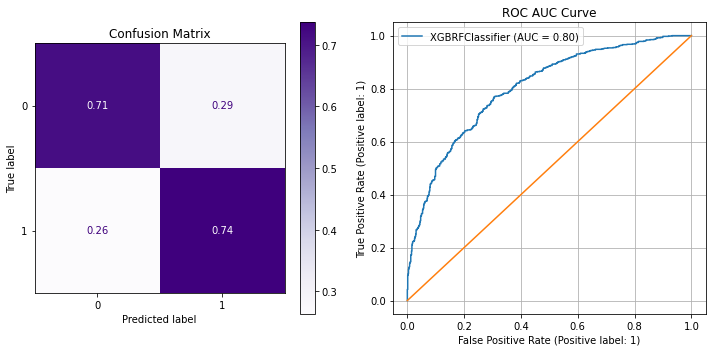

****MODEL PARAMETERS****


,parameters
base_score,0.5
colsample_bylevel,1
colsample_bynode,0.8
colsample_bytree,1
gamma,0
learning_rate,0.03
max_delta_step,0
max_depth,6
min_child_weight,3
missing,None


In [29]:
# оценим модель с лучшими параметрами
evaluate_model(xgb_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

улучшение  показателя recall   незначительно, но давайте посмотрим, сможем ли мы еще немного настроить гиперпараметры.

In [30]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf_ref = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.0001, 0.001],
          'max_depth': [6, 7, 8],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.5, 0.7],
          'n_estimators': [100]}
xgb_grid_refined = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid_refined.fit(X_train_select, y_train_select)

GridSearchCV(estimator=XGBRFClassifier(random_state=42),
             param_grid={'learning_rate': [0.0001, 0.001],
                         'max_depth': [6, 7, 8], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [100], 'subsample': [0.3, 0.5, 0.7]},
             scoring='recall_macro')

In [31]:
# лучшие параметры
xgb_grid_refined.best_params_

{'learning_rate': 0.001,
 'max_depth': 8,
 'min_child_weight': 4,
 'n_estimators': 100,
 'subsample': 0.7}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7663    0.7685    0.7674      4203
           1     0.7673    0.7651    0.7662      4194

    accuracy                         0.7668      8397
   macro avg     0.7668    0.7668    0.7668      8397
weighted avg     0.7668    0.7668    0.7668      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7306    0.7198    0.7252       746
           1     0.7202    0.7310    0.7256       736

    accuracy                         0.7254      1482
   macro avg     0.7254    0.7254    0.7254      1482
weighted avg     0.7254    0.7254    0.7254      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


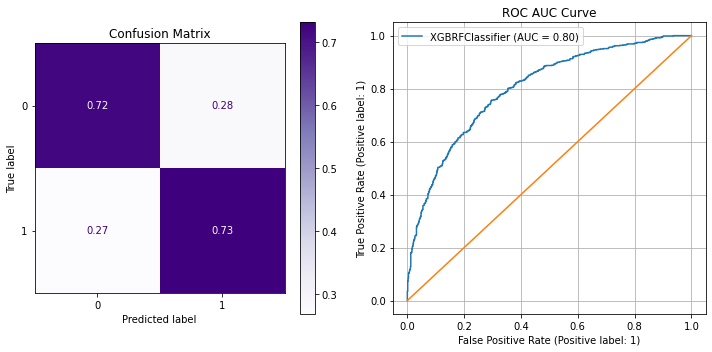

****MODEL PARAMETERS****


,parameters
base_score,0.5
colsample_bylevel,1
colsample_bynode,0.8
colsample_bytree,1
gamma,0
learning_rate,0.001
max_delta_step,0
max_depth,8
min_child_weight,4
missing,None


In [32]:
# оценка лучшей модели
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

 с recall = 0,7254 на тестовых данных тестирвания эта модель  с наилучшей прогностической способностью.  оценка на данных обучения составляет 0,7668, что показывает, что нет серьезной проблемы переобучения.

Можем сделать вывод, что  базовая модель логистической регрессии log_select и XGBoost gridsearch xgb_grid.bestestimator вернули самые высокие recall  0,7275 и 0,7170 соответственно.

### Logistic Regression

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7183    0.7219    0.7201      4203
           1     0.7199    0.7163    0.7181      4194

    accuracy                         0.7191      8397
   macro avg     0.7191    0.7191    0.7191      8397
weighted avg     0.7191    0.7191    0.7191      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7409    0.7359    0.7384       746
           1     0.7341    0.7391    0.7366       736

    accuracy                         0.7375      1482
   macro avg     0.7375    0.7375    0.7375      1482
weighted avg     0.7375    0.7375    0.7375      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


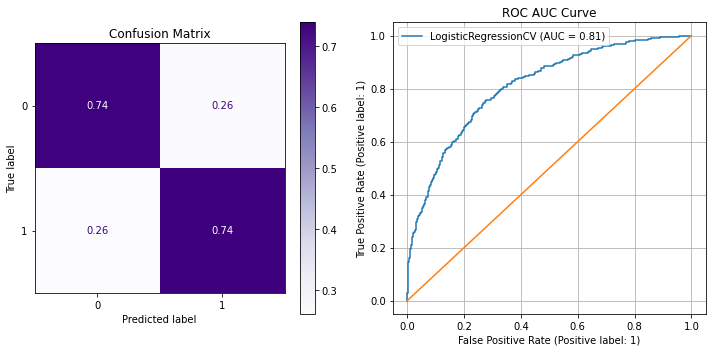

****MODEL PARAMETERS****


,parameters
Cs,10
class_weight,None
cv,None
dual,False
fit_intercept,True
intercept_scaling,1.0
l1_ratios,None
max_iter,100
multi_class,auto
n_jobs,None


In [33]:
# Evaluate best estimating Logistic Regression model.
evaluate_model(log_select, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

### XGBoost: Random Forest

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7663    0.7685    0.7674      4203
           1     0.7673    0.7651    0.7662      4194

    accuracy                         0.7668      8397
   macro avg     0.7668    0.7668    0.7668      8397
weighted avg     0.7668    0.7668    0.7668      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7306    0.7198    0.7252       746
           1     0.7202    0.7310    0.7256       736

    accuracy                         0.7254      1482
   macro avg     0.7254    0.7254    0.7254      1482
weighted avg     0.7254    0.7254    0.7254      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


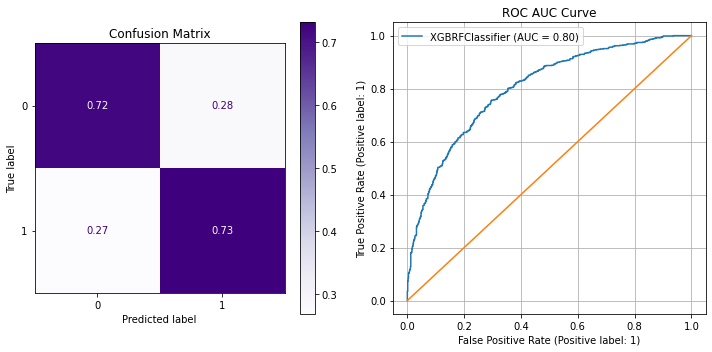

****MODEL PARAMETERS****


,parameters
base_score,0.5
colsample_bylevel,1
colsample_bynode,0.8
colsample_bytree,1
gamma,0
learning_rate,0.001
max_delta_step,0
max_depth,8
min_child_weight,4
missing,None


In [34]:
# Evaluate best estimating XGBoost model.
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

## Анализ коэффициентов логистической регрессии (Logistic Regression Coefficient Analysis)

Анализ коэффициентов логистической регрессии
recall = 0,7375 в  базовой модели логистической регрессии и  в gridsearched  XGBoost. Это означает, что наша окончательная модель логистической регрессии способна правильно определить 73,75% побед или поражений на основе данных, собранных в течение первых 10 минут каждого матча, в то время как наша модель XGBoost способна правильно определить 72,54%. Теперь определим вес каждого коэффициента и вклад его в победу.

In [35]:
# Extract coefficients from log_grid.best_estimator_ model.
log_coeff = pd.Series(log_select.coef_.flatten(),
               index=X_train_select.columns).sort_values(ascending=False)
log_coeff

blueKills                       0.699677
blueTotalMinionsKilled          0.245434
blueTotalJungleMinionsKilled    0.236101
blueDragons                     0.123289
blueTowersDestroyed             0.099688
blueHeralds                     0.052914
blueFirstBlood                  0.044651
blueAssists                     0.037790
blueWardsDestroyed              0.027930
blueWardsPlaced                 0.004091
redAssists                     -0.016966
redWardsDestroyed              -0.020594
redTowersDestroyed             -0.041389
redHeralds                     -0.047846
redWardsPlaced                 -0.061687
redDragons                     -0.101390
redTotalJungleMinionsKilled    -0.139189
redTotalMinionsKilled          -0.230101
blueDeaths                     -0.708742
dtype: float64

Для улучшения интерпретируемости результатов прологарифмируем коэффициенты

In [36]:
# Convert log coefficients to odds and subtract 1 to display change in odds.
log_odds = np.exp(log_coeff) - 1
log_odds

blueKills                       1.013102
blueTotalMinionsKilled          0.278175
blueTotalJungleMinionsKilled    0.266303
blueDragons                     0.131212
blueTowersDestroyed             0.104826
blueHeralds                     0.054338
blueFirstBlood                  0.045663
blueAssists                     0.038513
blueWardsDestroyed              0.028324
blueWardsPlaced                 0.004099
redAssists                     -0.016823
redWardsDestroyed              -0.020383
redTowersDestroyed             -0.040544
redHeralds                     -0.046719
redWardsPlaced                 -0.059823
redDragons                     -0.096419
redTotalJungleMinionsKilled    -0.129936
redTotalMinionsKilled          -0.205547
blueDeaths                     -0.507737
dtype: float64

In [38]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('darkgrid')

Переведём признаки на русский язык

In [39]:
# Change name of columns
renamed_cols = {'blueKills': 'Убито врагов',
                'blueTotalJungleMinionsKilled': 'Убито дж.миньонов',
                'blueTotalMinionsKilled': 'Убито миньонов',
                'blueTowersDestroyed': 'Уничтожено башен',
                'blueDragons': 'Уничтожено драконов',
                'blueHeralds': 'Уничтожено геральдов',
                'blueFirstBlood': 'Первая кровь',
                'blueAssists': 'Взаимодействие',
                'blueWardsDestroyed': 'Уничтожено вардов',
                'blueWardsPlaced': 'Установлено вардов',
                'redWardsDestroyed': 'Варды уничтоженные врагом',
                'redHeralds': 'Геральды уничтоженные врагом',
                'redTowersDestroyed': 'Башни уничтоженные врагом',
                'redAssists': 'Взаимодействие врагов',
                'redWardsPlaced': 'Варды установленные врагом',
                'redDragons': 'Драконы уничтоженные врагом',
                'redTotalJungleMinionsKilled': 'Дж.миньоны убитые врагом',
                'redTotalMinionsKilled': 'Миньоны убитые врагом',
                'blueDeaths': 'Убито врагами'
               }

log_odds.rename(renamed_cols, inplace=True)
log_odds

Убито врагов                    1.013102
Убито миньонов                  0.278175
Убито дж.миньонов               0.266303
Уничтожено драконов             0.131212
Уничтожено башен                0.104826
Уничтожено геральдов            0.054338
Первая кровь                    0.045663
Взаимодействие                  0.038513
Уничтожено вардов               0.028324
Установлено вардов              0.004099
Взаимодействие врагов          -0.016823
Варды уничтоженные врагом      -0.020383
Башни уничтоженные врагом      -0.040544
Геральды уничтоженные врагом   -0.046719
Варды установленные врагом     -0.059823
Драконы уничтоженные врагом    -0.096419
Дж.миньоны убитые врагом       -0.129936
Миньоны убитые врагом          -0.205547
Убито врагами                  -0.507737
dtype: float64

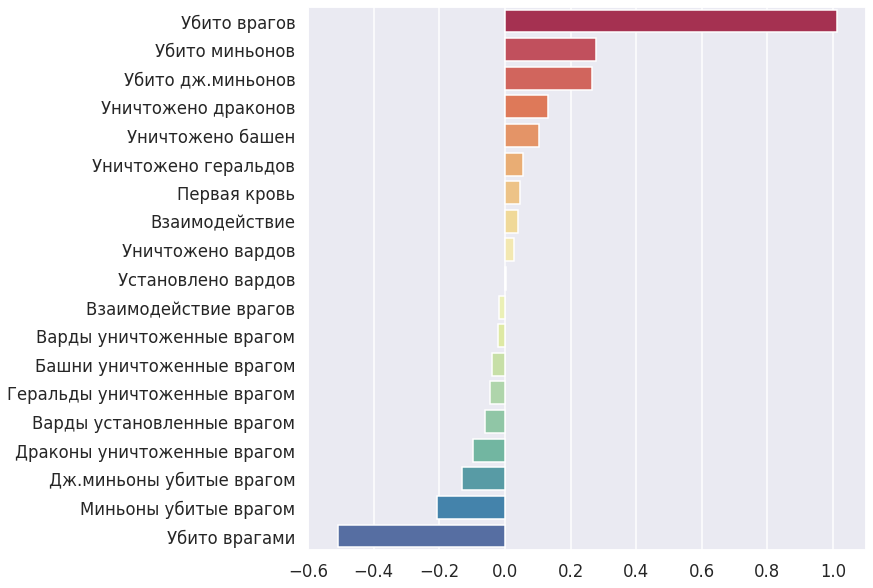

In [40]:
# Create bar plot of feature coefficients as odds.
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=log_odds.values, y=log_odds.index, palette='Spectral', ax=ax, orient='h')

# ax.set_title('Вклад коэффициентов в регрессионной модели')
# ax.set_xlabel('Вклад в победу')
# ax.set_ylabel('Признаки')
ax.set_xlim([-.6, 1.1]);


# Выводы

- Мы видим, что убийства и смерти чемпионов в течение первых 10 минут матча оказывают наибольшее влияние на исход матча. Мы видим, что общее количество миньонов на линии, общее количество  миньонов, крипов и драконов также имеет большое значение. Интересно, что геральды, башни и варды имеют наименьшее значение.
Поскольку наши отображаемые единицы представлены в виде шансов,  можем видеть, что увеличение на 1 стандартное отклонение каждого из вышеперечисленных параметров приведет к соответствующему процентному увеличению или уменьшению шансов на победу.
- Наилучший прогностический результат показала модель логистической регрессии способна правильно определить 73,75% побед или поражений на основе данных, собранных в течение первых 10 минут каждого матча 
